In [21]:
from qiskit import *
from qiskit.circuit.library import *
from qiskit.providers.aer import *
import matplotlib.pyplot as plt

sim_CPU = AerSimulator()

sim = AerSimulator(method='statevector', device='GPU')

shots = 100
depth=10

time_thrust= []
time_cuStateVec= []
time_CPU = []
qubits_list = []
qubits_lim = 27

In [22]:
for qubits in range (15, qubits_lim):
    qubits_list.append(qubits)

    circuit_CPU = QuantumVolume(qubits, depth, seed=0)
    circuit_CPU.measure_all()
    circuit_CPU = transpile(circuit_CPU, sim_CPU)
    
    result_CPU = sim_CPU.run(circuit_CPU, shots=shots, seed_simulator=12345).result()
    time_CPU.append(float(result_CPU.to_dict()['results'][0]['time_taken']))

In [23]:
for qubits in range(15, qubits_lim):
    circuit = QuantumVolume(qubits, depth, seed=0)
    circuit.measure_all()
    circuit = transpile(circuit, sim)
    result = sim.run(circuit,shots=shots,seed_simulator=12345,fusion_threshold=20,cuStateVec_enable=False).result()
    time_thrust.append(float(result.to_dict()['results'][0]['time_taken']))

In [24]:
for qubits in range(15, qubits_lim):
    circuit = QuantumVolume(qubits, depth, seed=0)
    circuit.measure_all()
    circuit = transpile(circuit, sim)
    result = sim.run(circuit,shots=shots,seed_simulator=12345,fusion_threshold=20,cuStateVec_enable=True).result()
    time_cuStateVec.append(float(result.to_dict()['results'][0]['time_taken']))

Text(0, 0.5, 'Simulation time (s)')

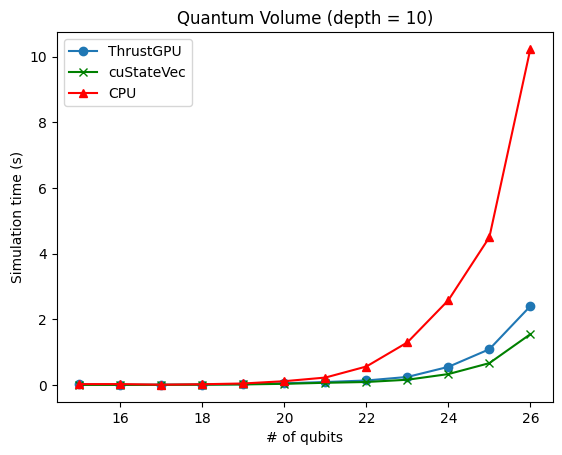

In [27]:
# plt.yscale("log")
plt.title('Quantum Volume (depth = 10)')
plt.plot(qubits_list, time_thrust, marker="o", label='ThrustGPU')
plt.plot(qubits_list, time_cuStateVec, 'g', marker="x", label='cuStateVec')
plt.plot(qubits_list, time_CPU, 'r', marker="^", label='CPU')
plt.legend()
plt.xlabel("# of qubits")
plt.ylabel("Simulation time (s)")